In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pylab as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [13]:
data = pd.read_csv("/home/srujan/Desktop/ds_edx/srujaan-3qmsB1xMGKSMxoNhlq2R5X.csv")

In [14]:
data.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,uri
0,0.532,0.0925,136.571,0.0286,0.43200,0.000006,4,0.601,10,281613,-9.119,0.341,1,audio_features,spotify:track:3gdewACMIVMEWVbyb8O9sY
1,0.759,0.2310,179.904,0.0431,0.05550,0.000000,4,0.263,0,284496,-7.288,0.429,1,audio_features,spotify:track:0IhUdJRoolbYeEMPL59XPm
2,0.776,0.3000,77.987,0.0459,0.05720,0.000008,4,0.585,5,244507,-5.898,0.427,1,audio_features,spotify:track:5xEM5hIgJ1jjgcEBfpkt2F
3,0.715,0.0942,155.925,0.0362,0.00125,0.000008,3,0.315,11,289533,-8.072,0.497,0,audio_features,spotify:track:6Qyc6fS4DsZjB2mRW9DsQs
4,0.609,0.1870,135.671,0.0339,0.42000,0.000000,4,0.495,7,257440,-9.902,0.330,1,audio_features,spotify:track:0tKjVEJlX3IZ5L1rEJc5hh


In [15]:
data.shape

(235, 15)

In [18]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy,235.0,0.700881,0.181633,0.121000,0.58800,0.719000,0.840000,0.978
liveness,235.0,0.167950,0.125046,0.029600,0.09220,0.118000,0.197000,0.832
tempo,235.0,123.683268,30.093087,57.860000,100.02500,121.070000,142.460500,195.881
speechiness,235.0,0.057567,0.045255,0.023300,0.03125,0.041400,0.059750,0.280
acousticness,235.0,0.142036,0.209577,0.000033,0.01025,0.048500,0.184000,0.910
instrumentalness,235.0,0.021897,0.102024,0.000000,0.00000,0.000002,0.000278,0.940
time_signature,235.0,3.961702,0.232557,3.000000,4.00000,4.000000,4.000000,5.000
danceability,235.0,0.538698,0.143604,0.163000,0.45150,0.547000,0.631500,0.930
key,235.0,4.655319,3.545239,0.000000,1.00000,4.000000,8.000000,11.000
duration_ms,235.0,241638.276596,61464.440610,131518.000000,205280.00000,230267.000000,258680.000000,547107.000


In [19]:
features = ['energy', 'liveness', 'speechiness', 'acousticness', 'instrumentalness', 'danceability', 'valence']

In [20]:
 select_df = data[features]

In [21]:
select_df

,energy,liveness,speechiness,acousticness,instrumentalness,danceability,valence
0,0.532,0.0925,0.0286,0.43200,0.000006,0.601,0.341
1,0.759,0.2310,0.0431,0.05550,0.000000,0.263,0.429
2,0.776,0.3000,0.0459,0.05720,0.000008,0.585,0.427
3,0.715,0.0942,0.0362,0.00125,0.000008,0.315,0.497
4,0.609,0.1870,0.0339,0.42000,0.000000,0.495,0.330
...,...,...,...,...,...,...,...
230,0.699,0.3850,0.0566,0.14900,0.006790,0.585,0.425
231,0.736,0.3470,0.0450,0.01650,0.000000,0.592,0.223
232,0.563,0.1790,0.1340,0.62100,0.000000,0.728,0.352
233,0.771,0.1140,0.0509,0.12200,0.000000,0.830,0.902


<p style="font-family: Arial; font-size:2.00em;color:purple; font-style:bold"><br>
Scaling the features using StandardScaler

In [22]:
X = StandardScaler().fit_transform(select_df)
X

array([[-0.93177769, -0.60466831, -0.64146156, ..., -0.21502009,
         0.43477385, -0.45478373],
       [ 0.32066469,  0.5052896 , -0.32036799, ..., -0.21508148,
        -1.92395077, -0.06575651],
       [ 0.41445994,  1.05826503, -0.25836371, ..., -0.21500545,
         0.32311825, -0.07459804],
       ...,
       [-0.76073931,  0.0885545 ,  1.69255654, ..., -0.21508148,
         1.32104021, -0.40615532],
       [ 0.3868731 , -0.43236437, -0.14764179, ..., -0.21508148,
         2.03284468,  2.02526477],
       [-1.68213965, -0.5044916 , -0.64146156, ..., -0.21472983,
         1.34895411,  0.46031438]])

<p style="font-family: Arial; font-size:2.00em;color:purple; font-style:bold"><br>
Using K-Means Clustering

In [29]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n",model) 

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


<p style="font-family: Arial; font-size:2.00em;color:purple; font-style:bold"><br>
Centers of 12 clusters

In [30]:
centers = model.cluster_centers_
centers

array([[ 2.71298776e-01, -1.18716375e-01,  2.36854301e+00,
        -1.44908154e-01, -2.13454130e-01,  8.49074911e-01,
         1.75570659e-01],
       [-6.52819601e-01, -2.65766501e-01, -4.06731090e-01,
         1.05156485e-01, -9.49960559e-02,  8.98702888e-01,
        -2.12543552e-01],
       [-1.55248152e+00, -2.28725162e-01, -4.23450100e-01,
         1.59141778e+00, -3.12417746e-02, -8.62873615e-01,
        -8.33643183e-01],
       [-1.04172591e-01,  3.75101491e+00, -3.06343214e-01,
         2.36796818e-01, -1.03583109e-01, -5.53843470e-01,
         2.81273449e-01],
       [-1.48535355e+00, -2.50710610e-01, -3.76467098e-01,
         3.48924227e-02,  7.49563725e+00, -1.14003539e+00,
        -1.35440916e+00],
       [ 6.50130345e-01, -4.13519702e-01, -2.45190162e-02,
        -5.60529936e-01, -1.25758154e-01, -1.06157668e-01,
         7.02767076e-02],
       [ 8.17227756e-01, -7.11657030e-01,  4.40524362e+00,
        -4.76266489e-01,  2.09322286e+00, -1.02023823e+00,
         1.9722156

<p style="font-family: Arial; font-size:2.00em;color:purple; font-style:bold"><br>
Plots

In [31]:
#Function that creats a DataFrame with a column for cluster Number

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    #zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [32]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [33]:
P = pd_centers(features, centers)

In [34]:
P

,energy,liveness,speechiness,acousticness,instrumentalness,danceability,valence,prediction
0,0.271299,-0.118716,2.368543,-0.144908,-0.213454,0.849075,0.175571,0
1,-0.652820,-0.265767,-0.406731,0.105156,-0.094996,0.898703,-0.212544,1
2,-1.552482,-0.228725,-0.423450,1.591418,-0.031242,-0.862874,-0.833643,2
3,-0.104173,3.751015,-0.306343,0.236797,-0.103583,-0.553843,0.281273,3
4,-1.485354,-0.250711,-0.376467,0.034892,7.495637,-1.140035,-1.354409,4
5,0.650130,-0.413520,-0.024519,-0.560530,-0.125758,-0.106158,0.070277,5
6,0.817228,-0.711657,4.405244,-0.476266,2.093223,-1.020238,1.972216,6
7,0.491256,-0.644761,-0.312408,-0.208367,-0.068535,0.818024,1.323319,7
8,-0.302463,0.018637,-0.515306,-0.347723,-0.211779,-0.415966,-1.018820,8
9,0.581900,0.006357,-0.099887,-0.519820,-0.082084,-1.603851,-0.539297,9


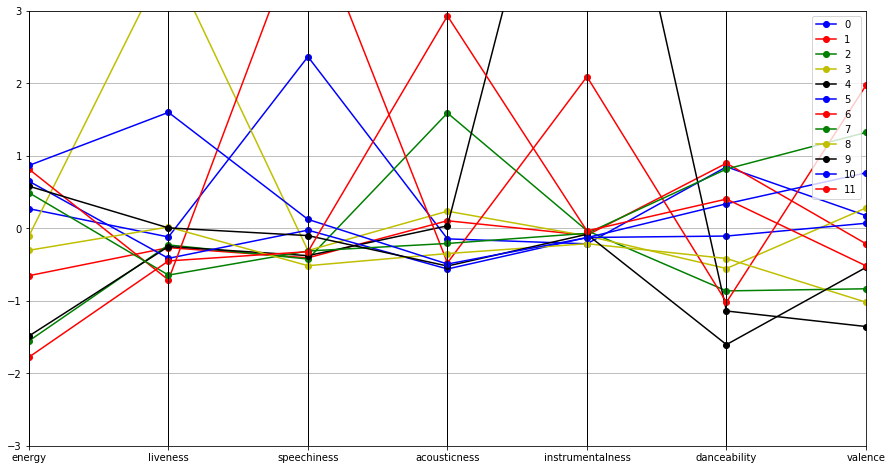

In [56]:
parallel_plot(P[P['energy'] < 2.5] )

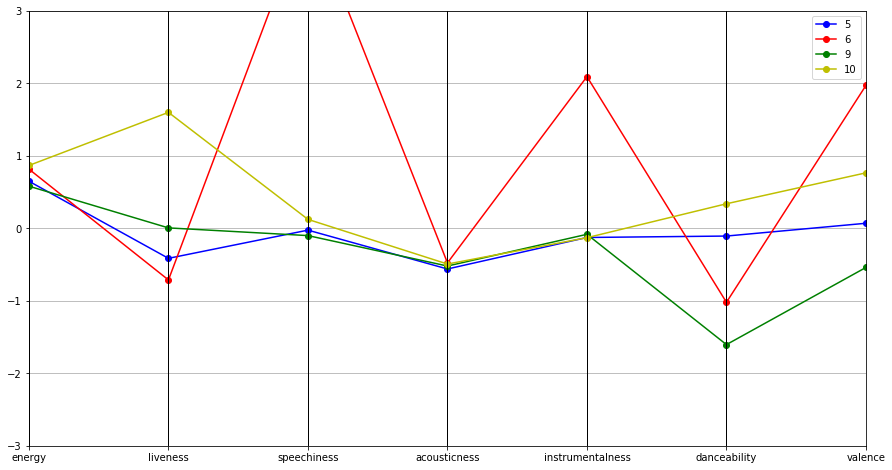

In [57]:
parallel_plot(P[(P['energy'] > 0.5) & (P['acousticness'] < 0.5)])